# Ahmed Abd-Elsalam Muhammed Afify

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
# Importing Required Libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [84]:
# 1) Loading the data:
x = np.random.uniform(0,20,1000).reshape(-1,1)
a = -1
b = 2
y = a*x + b

In [85]:
print(x[:10].T)
print(y[:10].T)

[[13.91245601 14.79216717 18.45683773 18.32292832  7.61245482  2.04241792
   4.40059064 12.99188054 10.58321907  3.91868828]]
[[-11.91245601 -12.79216717 -16.45683773 -16.32292832  -5.61245482
   -0.04241792  -2.40059064 -10.99188054  -8.58321907  -1.91868828]]


#### Plot your data points. 

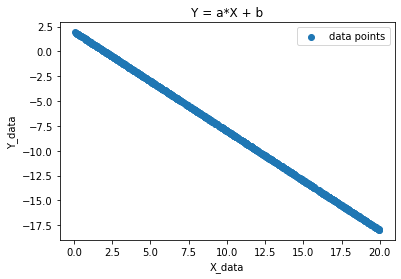

In [86]:
# plotting data points:
plt.scatter(x, y, label='data points')
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.title('Y = a*X + b')
plt.legend()
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

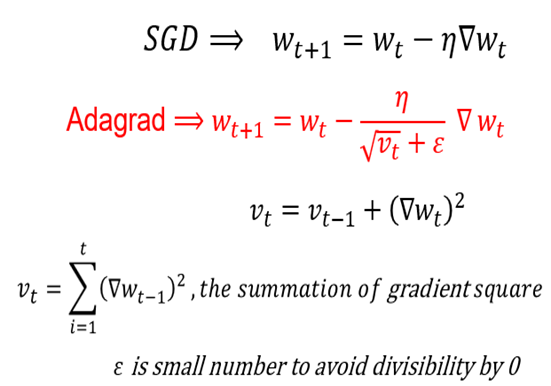

In [87]:
def adagrad(x, y, alpha=0.1, epslon=10**(-8), epoches=1000):
    # 2) Implementing the Adagrad GD:

    # initialize the parameters:
    m = x.shape[0]
    Xs = np.concatenate((np.ones((m,1)), x), axis=1)
    thetas = np.zeros((Xs.shape[1],1))
    yhat = np.zeros((m,1))

    # Hyper_parameters:
    vt = np.ones((Xs.shape[1],1))

    # Lists to store values of epoches:
    loss_lst = []
    theta_0 = []
    theta_1 = []
    yhat_lst = []

    # Implementing Iterations:
    for i in range(epoches):
        yhat = Xs@ thetas
        error = yhat - y
        J_loss = (1/(2*m)) * np.sum(error**2)
        grd = (1/m) * (Xs.T @ error).reshape(-1,1)
        vt = vt + (grd)**2
        thetas = thetas - (alpha/((np.sqrt(vt)+epslon)))*grd

        loss_lst.append(J_loss)
        theta_0.append(thetas[0])
        theta_1.append(thetas[1])
        yhat_lst.append(yhat)
        
    return theta_0, theta_1, loss_lst, yhat_lst, thetas

### Implementing and training the model:

In [196]:
# Training our model:
theta_0, theta_1, loss_lst, yhat_lst, thetas = adagrad(x, y, 0.15, 10**(-8), 200)

In [197]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [0.22067353]
theta_1 = [-0.86147032]


In [198]:
# calculating the last Hypothesis based on last optimal values of thetas:
yhat = yhat_lst[-1]

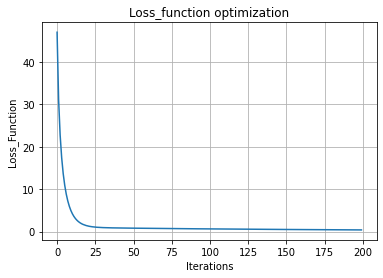

In [199]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

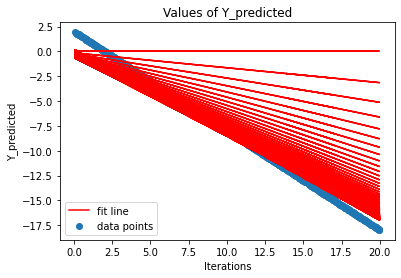

In [200]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(len(yhat_lst)-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

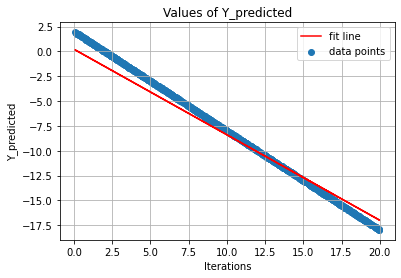

In [201]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

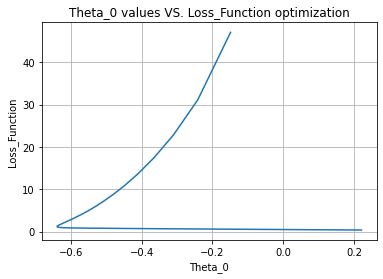

In [202]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

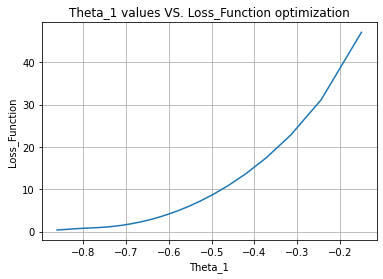

In [203]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [204]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.9753597701607327


### Trying another values:

In [205]:
# Training our model:
theta_0, theta_1, loss_lst, yhat_lst, thetas = adagrad(x, y, 0.1, 10**(-8), 500)

In [206]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [0.41043248]
theta_1 = [-0.87629292]


In [207]:
# calculating the last Hypothesis based on last optimal values of thetas:
yhat = yhat_lst[-1]

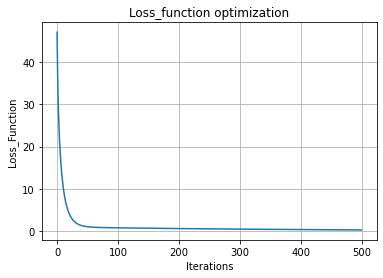

In [208]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

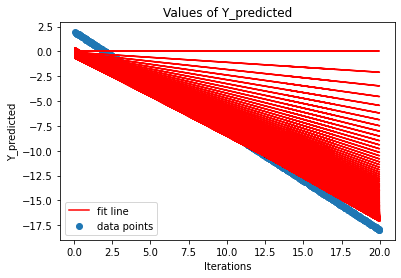

In [209]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(len(yhat_lst)-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

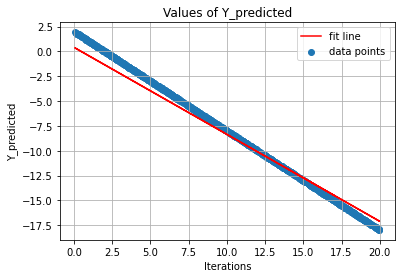

In [210]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

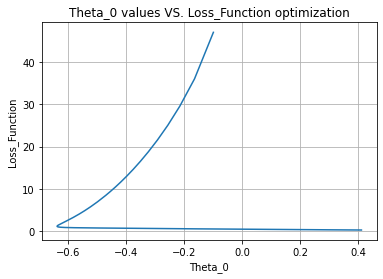

In [211]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

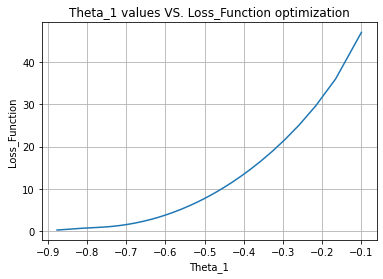

In [212]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [213]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.980381615257758


___

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

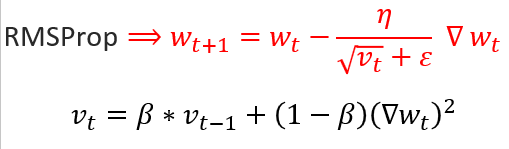

In [70]:
def rmsprop(x, y, alpha=0.1, epslon=10**(-8), beta=0.98, epoches=1000):
    # 2) Implementing the RMSProp GD:

    # initialize the parameters:
    m = x.shape[0]
    Xs = np.concatenate((np.ones((m,1)), x), axis=1)
    thetas = np.zeros((Xs.shape[1],1))
    yhat = np.zeros((m,1))

    # Hyper_parameters:
    vt = np.ones((Xs.shape[1],1))

    # Lists to store values of epoches:
    loss_lst = []
    theta_0 = []
    theta_1 = []
    yhat_lst = []

    # Implementing Iterations:
    for i in range(epoches):
        yhat = Xs@ thetas
        error = yhat - y
        J_loss = (1/(2*m)) * np.sum(error**2)
        
        grd = (1/m) * (Xs.T @ error).reshape(-1,1)
        vt = beta*vt + (1-beta)*(grd)**2
        thetas = thetas - (alpha/((np.sqrt(vt)+epslon)))*grd

        loss_lst.append(J_loss)
        theta_0.append(thetas[0])
        theta_1.append(thetas[1])
        yhat_lst.append(yhat)
        
    return theta_0, theta_1, loss_lst, yhat_lst, thetas

### Implementing and training the model:

In [142]:
theta_0, theta_1, loss_lst, yhat_lst, thetas = rmsprop(x, y, 0.1, 10**(-8), 0.8, 200)

In [143]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [1.94857993]
theta_1 = [-1.04988964]


In [144]:
# calculating the last Hypothesis based on last optimal values of thetas:
yhat = yhat_lst[-1]

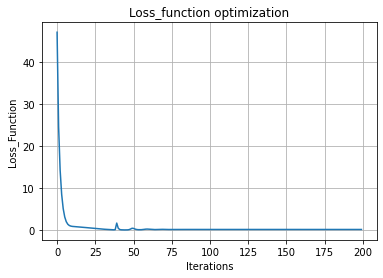

In [145]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

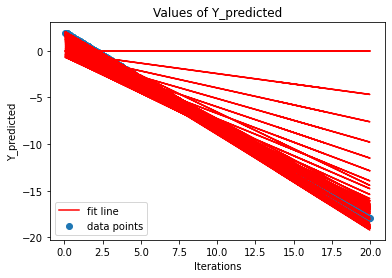

In [146]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(len(yhat_lst)-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

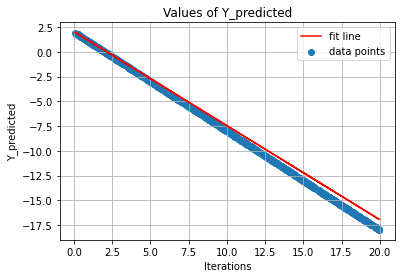

In [147]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

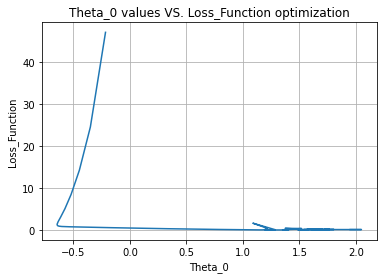

In [148]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

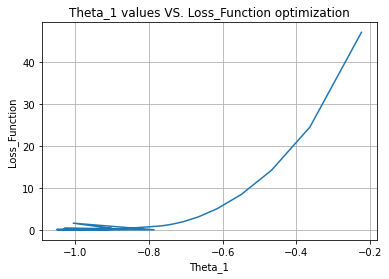

In [149]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [150]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.9886491905742442


### Trying another values:

In [151]:
theta_0, theta_1, loss_lst, yhat_lst, thetas = rmsprop(x, y, 0.01, 10**(-8), 0.9, 500)

In [152]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [2.00423315]
theta_1 = [-0.99494041]


In [153]:
# calculating the last Hypothesis based on last optimal values of thetas:
yhat = yhat_lst[-1]

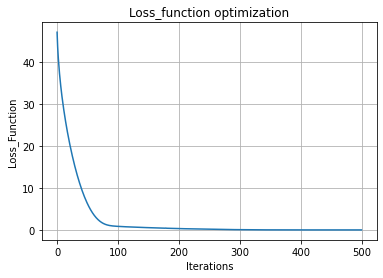

In [154]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

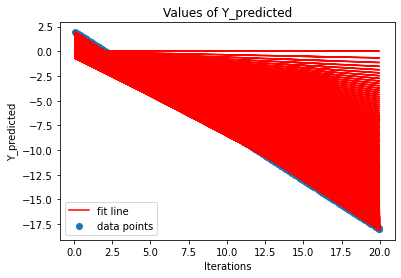

In [155]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(len(yhat_lst)-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

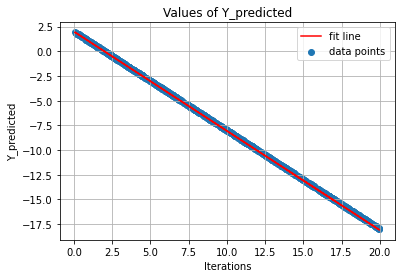

In [156]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

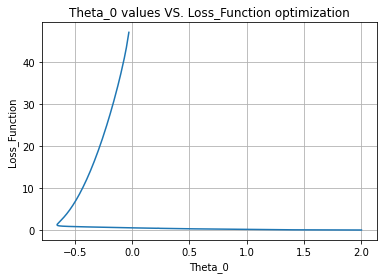

In [157]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

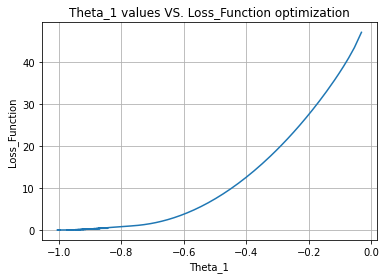

In [158]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [159]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.9998864872257062


___

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

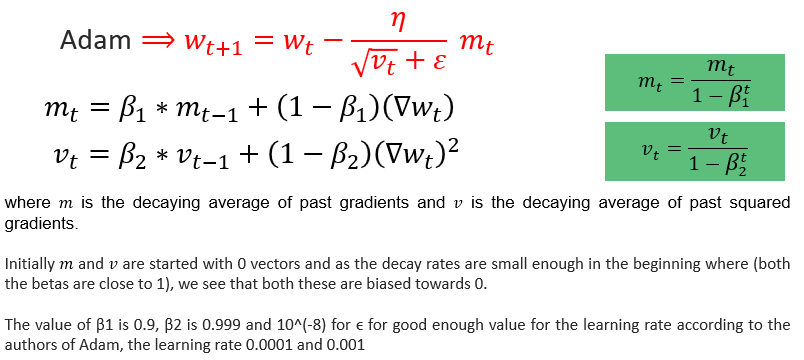

In [71]:
def adam(x, y, alpha=0.1, epslon=10**(-8), beta1=0.8, beta2=0.9, epoches=1000):
    # 2) Implementing the Adam GD:

    # initialize the parameters:
    m = x.shape[0]
    Xs = np.concatenate((np.ones((m,1)), x), axis=1)
    thetas = np.zeros((Xs.shape[1],1))
    yhat = np.zeros((m,1))

    # Hyper_parameters:
    mt = np.ones((Xs.shape[1],1))
    vt = np.ones((Xs.shape[1],1))

    # Lists to store values of epoches:
    loss_lst = []
    theta_0 = []
    theta_1 = []
    yhat_lst = []

    # Implementing Iterations:
    for i in range(epoches):
        yhat = Xs@ thetas
        error = yhat - y
        J_loss = (1/(2*m)) * np.sum(error**2)
        
        grd = (1/m) * (Xs.T @ error).reshape(-1,1)
        mt = beta1*mt + (1-beta1)*grd
        vt = beta2*vt + (1-beta2)*(grd)**2

        mt = mt / (1- (beta1**(i+1)))
        vt = vt / (1- (beta2**(i+1)))

        thetas = thetas - (alpha/((np.sqrt(vt)+epslon)))*mt

        loss_lst.append(J_loss)
        theta_0.append(thetas[0])
        theta_1.append(thetas[1])
        yhat_lst.append(yhat)
        
    return theta_0, theta_1, loss_lst, yhat_lst, thetas

### Implementing and training the model:

In [160]:
theta_0, theta_1, loss_lst, yhat_lst, thetas = adam(x, y, 0.1, 10**(-8), 0.8, 0.85, 200)

In [161]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [1.99287127]
theta_1 = [-1.00711698]


In [162]:
# calculating the final Hypothesis based on final theta values:
yhat = yhat_lst[-1]

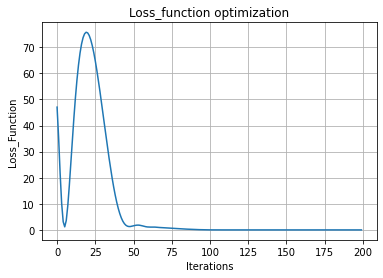

In [163]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

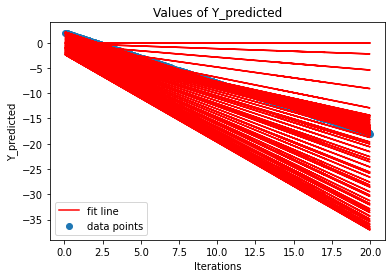

In [164]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(len(yhat_lst)-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

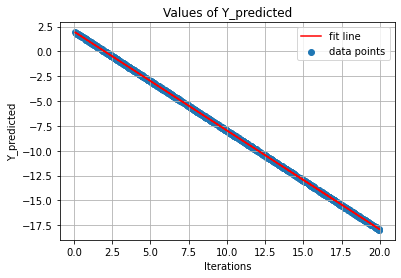

In [165]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

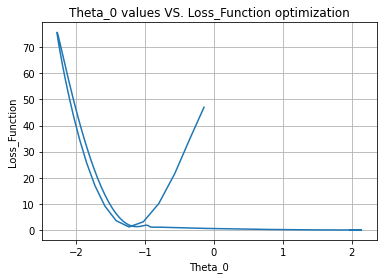

In [166]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

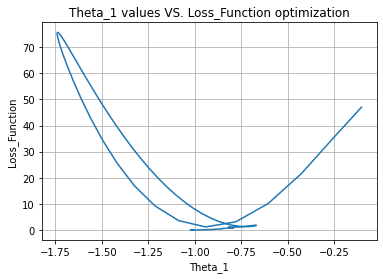

In [167]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [168]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.9999424754931036


### Trying another values:

In [169]:
theta_0, theta_1, loss_lst, yhat_lst, thetas = adam(x, y, 0.01, 10**(-8), 0.8, 0.85, 500)

In [170]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [1.99914543]
theta_1 = [-1.00085456]


In [171]:
# calculating the final Hypothesis based on final theta values:
yhat = yhat_lst[-1]

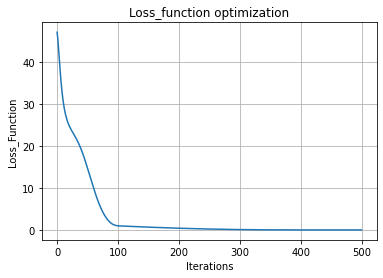

In [172]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

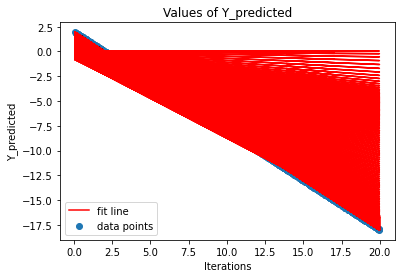

In [173]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(len(yhat_lst)-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

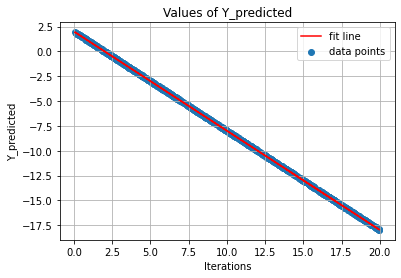

In [174]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

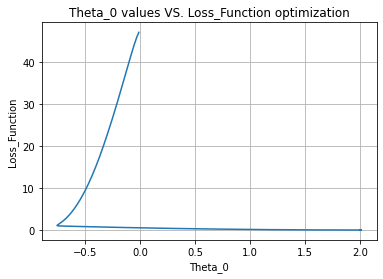

In [175]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

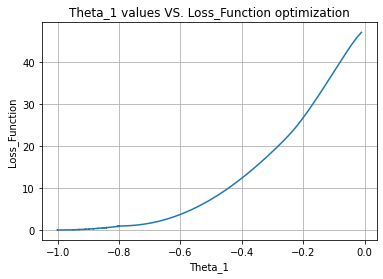

In [176]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [177]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.999997106309978


---
___ 
## Comparing between the different techniques:

### 1) trying: 
* alpha = 0.1
* epochs = 200
* beta = 0.95
* beta1 = 0.85
* beta2 = 0.95

In [281]:
# Training our model:
# Adagrad:
t_0_Ag, t_1_Ag, loss_Ag, yhat_lst_Ag, thetas_Ag = adagrad(x, y, 0.1, 10**(-8), 200)
# RMSProp:
t_0_rms, t_1_rms, loss_rms, yhat_lst_rms, thetas_rms = rmsprop(x, y, 0.1, 10**(-8), 0.95, 200)
# Adam:
t_0_ad, t_1_ad, loss_ad, yhat_lst_ad, thetas_ad = adam(x, y, 0.1, 10**(-8), 0.85, 0.95, 200)

### plotting loss function compared to each other:

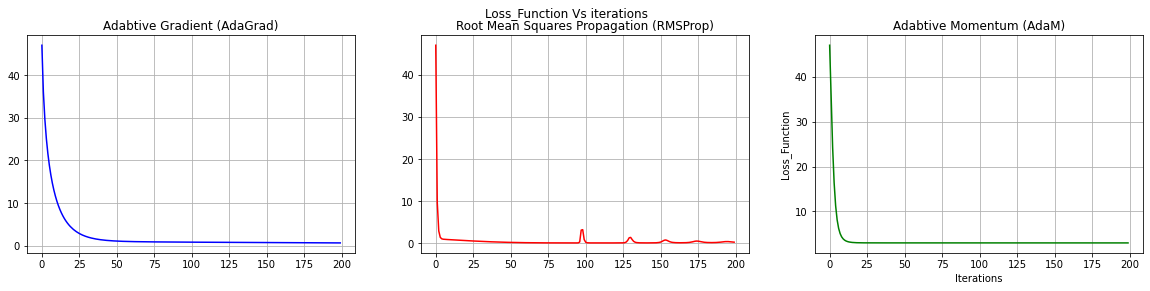

In [282]:
# plotting loss function compared to each other:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Loss_Function Vs iterations')

axs[0].plot(loss_Ag, color='b')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].plot(loss_rms, color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].plot(loss_ad, color='g')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### plotting best fit line Vs data:

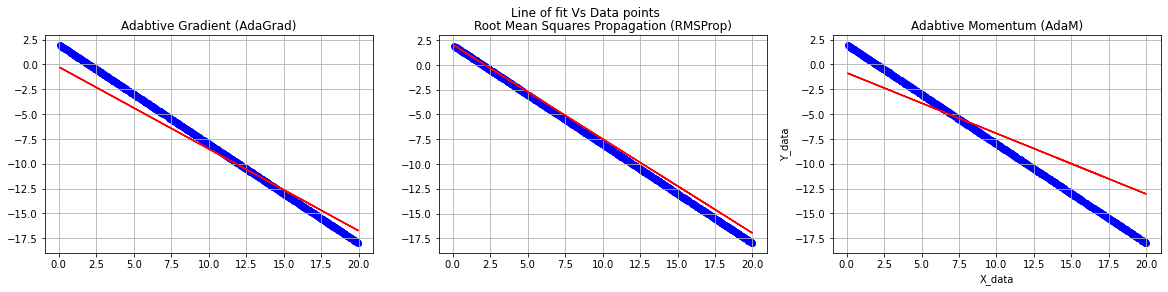

In [283]:
# plotting best fit line Vs data:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Line of fit Vs Data points')

axs[0].scatter(x, y, color='b')
axs[0].plot(x, yhat_lst_Ag[-1], color='r')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].scatter(x, y, color='b')
axs[1].plot(x, yhat_lst_rms[-1], color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].scatter(x, y, color='b')
axs[2].plot(x, yhat_lst_ad[-1], color='r')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('X_data')
plt.ylabel('Y_data')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### plotting theta_0 Vs loss function:

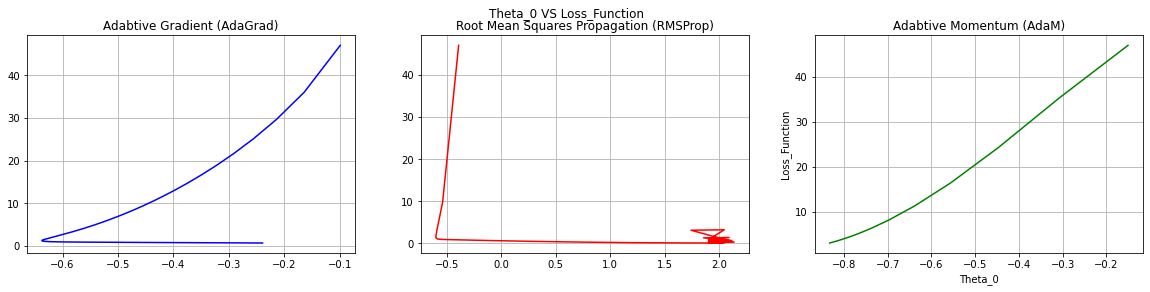

In [284]:
# plotting theta_0 Vs loss function:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Theta_0 VS Loss_Function')

axs[0].plot(t_0_Ag, loss_Ag, color='b')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].plot(t_0_rms, loss_rms, color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].plot(t_0_ad, loss_ad, color='g')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### plotting theta_1 Vs loss function:

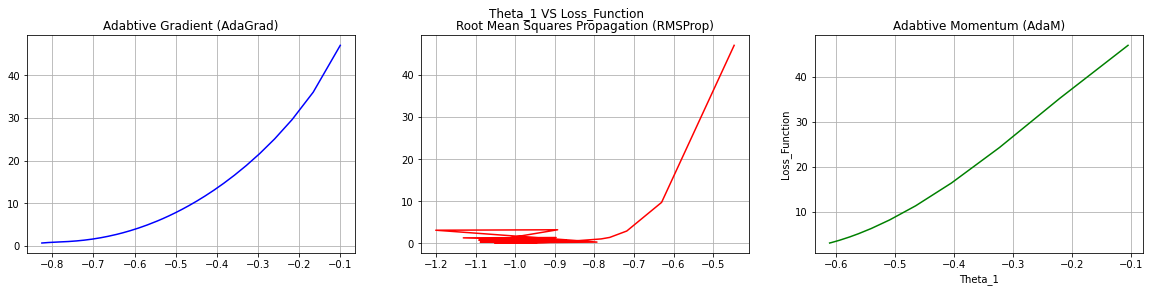

In [285]:
# plotting theta_1 Vs loss function:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Theta_1 VS Loss_Function')

axs[0].plot(t_1_Ag, loss_Ag, color='b')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].plot(t_1_rms, loss_rms, color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].plot(t_1_ad, loss_ad, color='g')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### Calculating goodness of fit of the line:

In [286]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres_Ag = np.sum((y-yhat_lst_Ag[-1])**2)
R2_Ag = 1 - (SSres_Ag/SStot)
print(f'AdaGrad: R-Squared (R2)= {R2_Ag}')

SSres_rms = np.sum((y-yhat_lst_rms[-1])**2)
R2_rms = 1 - (SSres_rms/SStot)
print(f'RMSProp: R-Squared (R2)= {R2_rms}')

SSres_ad = np.sum((y-yhat_lst_ad[-1])**2)
R2_ad = 1 - (SSres_ad/SStot)
print(f'Adam: R-Squared (R2)= {R2_ad}')


AdaGrad: R-Squared (R2)= 0.9610482743830329
RMSProp: R-Squared (R2)= 0.9891908271906465
Adam: R-Squared (R2)= 0.8189430994292237


---
## 2) Another trial: 
* alpha = 0.01 (and 0.1 for adagrad)
* epochs = 500
* beta = 0.9
* beta1 = 0.8
* beta2 = 0.85

In [287]:
# Training our model:
# Adagrad:
t_0_Ag, t_1_Ag, loss_Ag, yhat_lst_Ag, thetas_Ag = adagrad(x, y, 0.01, 10**(-8), 500)
# RMSProp:
t_0_rms, t_1_rms, loss_rms, yhat_lst_rms, thetas_rms = rmsprop(x, y, 0.01, 10**(-8), 0.9, 500)
# Adam:
t_0_ad, t_1_ad, loss_ad, yhat_lst_ad, thetas_ad = adam(x, y, 0.01, 10**(-8), 0.8, 0.85, 500)

### plotting loss function compared to each other:

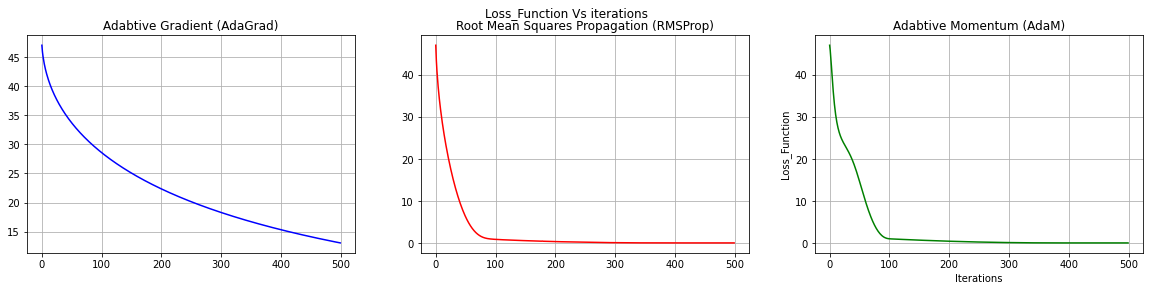

In [288]:
# plotting loss function compared to each other:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Loss_Function Vs iterations')

axs[0].plot(loss_Ag, color='b')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].plot(loss_rms, color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].plot(loss_ad, color='g')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### plotting best fit line Vs data:

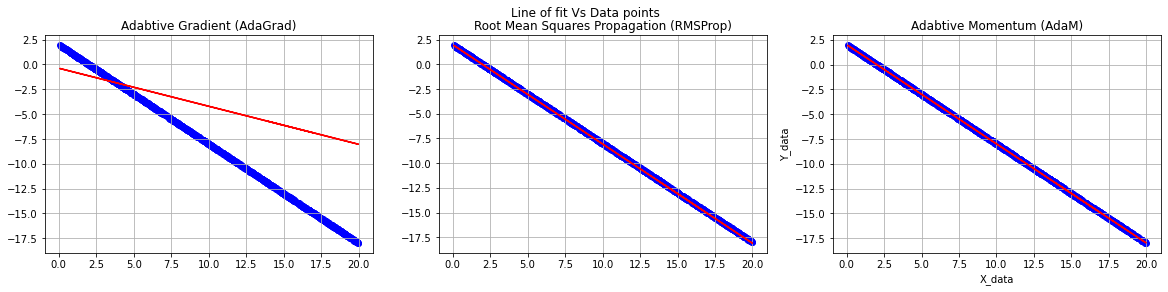

In [289]:
# plotting best fit line Vs data:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Line of fit Vs Data points')

axs[0].scatter(x, y, color='b')
axs[0].plot(x, yhat_lst_Ag[-1], color='r')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].scatter(x, y, color='b')
axs[1].plot(x, yhat_lst_rms[-1], color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].scatter(x, y, color='b')
axs[2].plot(x, yhat_lst_ad[-1], color='r')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('X_data')
plt.ylabel('Y_data')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### plotting theta_0 Vs loss function:

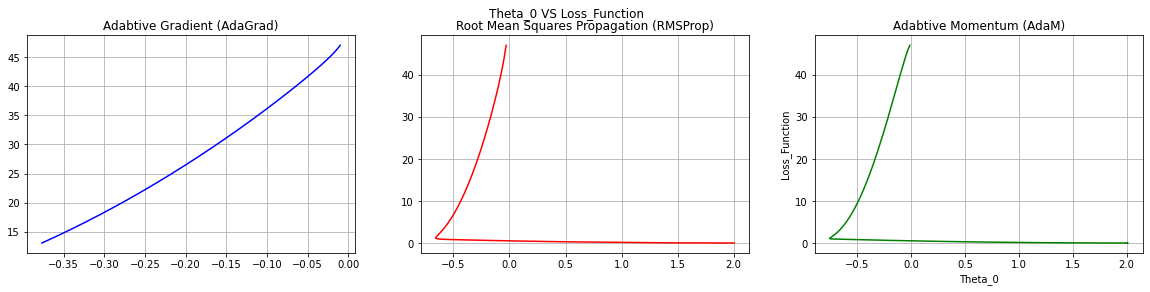

In [290]:
# plotting theta_0 Vs loss function:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Theta_0 VS Loss_Function')

axs[0].plot(t_0_Ag, loss_Ag, color='b')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].plot(t_0_rms, loss_rms, color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].plot(t_0_ad, loss_ad, color='g')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### plotting theta_1 Vs loss function:

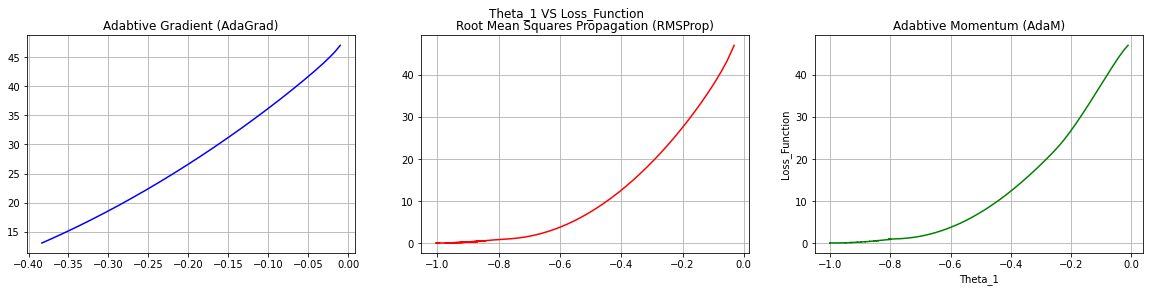

In [291]:
# plotting theta_1 Vs loss function:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Theta_1 VS Loss_Function')

axs[0].plot(t_1_Ag, loss_Ag, color='b')
axs[0].set_title('Adabtive Gradient (AdaGrad)')


axs[1].plot(t_1_rms, loss_rms, color='r')
axs[1].set_title('Root Mean Squares Propagation (RMSProp)')

axs[2].plot(t_1_ad, loss_ad, color='g')
axs[2].set_title('Adabtive Momentum (AdaM)')

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

### Calculating goodness of fit of the line:

In [292]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres_Ag = np.sum((y-yhat_lst_Ag[-1])**2)
R2_Ag = 1 - (SSres_Ag/SStot)
print(f'AdaGrad: R-Squared (R2)= {R2_Ag}')

SSres_rms = np.sum((y-yhat_lst_rms[-1])**2)
R2_rms = 1 - (SSres_rms/SStot)
print(f'RMSProp: R-Squared (R2)= {R2_rms}')

SSres_ad = np.sum((y-yhat_lst_ad[-1])**2)
R2_ad = 1 - (SSres_ad/SStot)
print(f'Adam: R-Squared (R2)= {R2_ad}')


AdaGrad: R-Squared (R2)= 0.20949532268333892
RMSProp: R-Squared (R2)= 0.9998864872257062
Adam: R-Squared (R2)= 0.999997106309978


---
---
## Conclusion:
**From the above figures we can conclude that:**

1) Using the same parametaer and Hyperparameter for each optimizer, the **Adagrad** optimizer is the slowest among them all; despite it converge smoothly without any overshoot and update its value based on the gradient of each feature.


2) In the the other two optimizers we got the value of thetas but more quick, as we used:

    * The concept of exponentially wighted moving average (EWMA) in the **RMSProp** which gave us a decaying momentum (vt) using beta. 
    * the momentum concept at the **Adam** optimizer and so this accelerated the process.


3) We can say that the **Adagrad** optimzer can give the same result as both RMSProp and Adam, but we actually need **larger learning rate value as will increasing the number of iterations to achieve our minimum**.

    * for the (alpha=0.1) in RMSPRop and Adam, we have to use (alpha=0.15) in Adagrad for the same epochs (200) in the first case.
    * for the (alpha=0.01) in RMSPRop and Adam, we have to use (alpha=0.1) in Adagrad for the same epochs (500) in the second case.
    
4) The Hyperparameters beta1, beta2 of Adam Optimizer should be choozen carfully or the optimizer wont give us the desired optimization.

## Congratulations 
![image.png](attachment:image.png)

**At the End, I'd like to thak you for your Effort with us not just in this vital course but also for the Numerical algorithms course**
# Thank You!